 COVID-19 GENE SEQUENCING WITH BIOPYTHON AND MUTATIONS DETECTION

# Background

Scientists around the world have been working tirelessly to find ways to better understand, treat and eventually eliminate COVID-19 from spreading. SARS-CoV-2, causes COVID-19, is a virus closely related to the virus that cause SARS back in 2001. SARS-CoV-2 was first was identified in Wuhan, China, in December 2019 [1]. It has quickly spread all over the world. Up till now, the virus has killed over 1 million of people world wide. The virus enters the body through the eyes, nose, or mouth and then travels down toward the lungs. It inflames the lining of the airways. The virus then travels to the lungs and causes the lungs to become inflamed and fill with fluid. This results in reduction of the oxygen supply to the bloodstream. If oxygen levels in the bloodstream decrease, the heart works harder to supply organs and the rest of the body with enough oxygen to function. Pneumonia can progress to into acute respiratory failure, in which case the person may need a ventilator to help them breathe [2].

The typical symptoms of COVID-19 are: fever or chills, cough, shortness of breath or difficulty breathing, fatigue, muscle or body aches, headache, loss of taste or smell, sore throat, congestion or runny nose, nausea or vomiting and diarrhea.

Viruses are very interesting that they are are not living things until they enter a host and use the host cell mechanism to make multiple copies of themselves. Viruses consist of two minimum basic components: a single or double strand of DNA or RNA and a protein coated membrane called capsid. Some have proteins such as reverse transcriptease, RNA polymerase, kinases, and proteases. The genetic information is protected inside the capsid. Some viruses have an extra layer that covers the capsid called envolope. When the virus contacts the host cell, the capsid binds to the receptors on the host cell membrane and it injects its genome into the cell leaving the rest of of virus on the surface. Once inside, the virus forms its own proteins (either by itself or by using the host) to control the host cell. See the schematic of a coronavirus <a href="https://ars.els-cdn.com/content/image/1-s2.0-S1684118220300827-gr1_lrg.jpg" target="_blank">here</a>.

Coronaviruses are members of the subfamily Coronavirinae in the family Coronaviridae and the order Nidovirales. Sequence analysis of SARS-CoV-2 isolates suggests that the 30-kb genome encodes as many as 29 proteins though not all may be expressed. Coronaviruses possess the largest genomes (26.4–31.7 kb) among all known RNA viruses [3]. The viral genome is shown in the picture below [4]: 
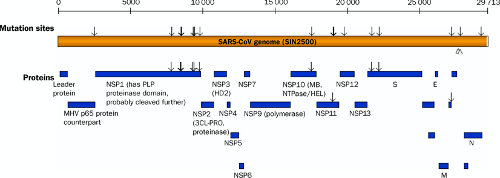 

SARS-CoV-2 has 29 711 nucleotides that encode for 29 proteins [4]. These proteins are:

IBV-M
SARD-CoV:NSP13
IBV:N TGEV:N
TGEV:N
IBV:N MHV:NSP2
IBV:N MHV:NSP2
MHV:NSP2 SARS-CoV-ORFG
SARS-CoV:N SARS-CoV:NSP1 SARS-CoV-NSP15
SARS-CoV:NSP1
IBV:N MHV: NSP2
IBV:N
HCoV-OC43:N IBV:N TGEV:N
SARS-CoV-ORF9B
IBV:N TGEV:N
MHV:NSP2 SARS-CoV-2-NSP8
MHV:N
IBV:N SARS-CoV-2-N
SARS-CoV:NSP7 SARS-CoV:ORF3A

According to Alla Katsnelson on the article "What do we know about the novel coronavirus’s 29 proteins?", here is what we know so far [5]:

    1. S protiens: SARS-CoV-2 has mnay protein spikes (also called S proteins) covering its outer membrane. The virus may use these spikes to enter the host cells by binding to the receptor ACE2 and hack its way to the host cells. The SAR-CoV-2's spikes share 80% of its residues with SARS.  
    
    2. 4 proteins make up the viral's actual structure.
    
    3. 25 coronavirus proteins regulates how the virus assembles copies of itself and how it sneaks past the host immune system.

# Project Goals

1. To analyze COVID-19 gene sequences between Jan 2020 to date (Sep 2020) 
2. To detect mutations (if yes, then what has changed?)

# List of Libraries 

In [116]:
import os
import glob
import shutil
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import imgaug as ia
import imgaug.augmenters as iaa
from imgaug import augmenters as iaa
from os import listdir, makedirs, getcwd, remove
from os.path import isfile, join, abspath, exists, isdir, expanduser
from PIL import Image
from pathlib import Path
from skimage.io import imread
from skimage.transform import resize
from keras.models import Sequential, Model
from keras.applications.vgg16 import VGG16, preprocess_input
from keras.preprocessing.image import ImageDataGenerator,load_img, img_to_array
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dense, Dropout, Input, Flatten, SeparableConv2D
from keras.layers import GlobalMaxPooling2D
from keras.layers.normalization import BatchNormalization
from keras.layers.merge import Concatenate
from keras.models import Model
from keras.optimizers import Adam, SGD, RMSprop
from keras.callbacks import ModelCheckpoint, Callback, EarlyStopping
from keras.utils import to_categorical
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from mlxtend.plotting import plot_confusion_matrix
from sklearn.metrics import confusion_matrix
from keras import backend as K
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

# Special library:
from Bio.Blast import NCBIWWW
from Bio.Blast import NCBIXML
from Bio.Seq import Seq
pd.plotting.register_matplotlib_converters()
from Bio import SeqIO 
from Bio.SeqUtils import GC
from reportlab.lib import colors 
from reportlab.lib.units import cm 
from Bio.Graphics import GenomeDiagram

# Goal #1: Covid-19 Gene Sequencing

DNA (Deoxiribonucleic acid) is made of four molecues (Adenine, Thymine, Cystosine, and Guanine). These are the genetic determining the makeup of all living cells and viruses. One of the major functions in DNA is to encode sequence of amino acids residues in proteins. The cell acheives this in two steps: 

    1. Enzymes read the DNA nucleotides and transcribe them into messenger ribonucleic acid (mRNA). Like DNA, RNA also has four bases with the exception of T. In RNA, cystine is replaced with Uracil. 
    
    2. The mRNA is then translated into the "language" of amino acids. There are 20 naturally occuring amino acids. All of them have the same basic structure: an alpha carbon, a amino group, a carboxyl group and a side chain (R). 
        R
    +NH3-C-COO-
        H
Name\3 letters symbol\1 letter symbol
1. Alanine\         Ala\     A
2. Cysteine\        Cys\     C
3. Aspartic AciD\   Asp\     D
4. Glutamic Acid\   Glu\     E
5. Phenylalanine\   Phe\     F
6. Glycine\         Gly\     G
7. Histidine\       His\     H
8. Isoleucine\      Ile\     I
9. Lysine\          Lys\     K
10. Leucine\         Leu\     L
11. Methionine\      Met\     M
12. AsparagiNe\      Asn\     N
13. Proline\         Pro\     P       
14. Glutamine\       Gln\     Q
15. ARginine\        Arg\     R
16. Serine\          Ser\     S
17. Threonine\       Thr\     T
18. Valine\          Val\     V
19. Tryptophan\      Trp\     W
20. TYrosine\        Tyr\     Y

In [2]:
from Bio.Data import CodonTable
print(CodonTable.unambiguous_rna_by_name['Standard'])

Table 1 Standard, SGC0

  |  U      |  C      |  A      |  G      |
--+---------+---------+---------+---------+--
U | UUU F   | UCU S   | UAU Y   | UGU C   | U
U | UUC F   | UCC S   | UAC Y   | UGC C   | C
U | UUA L   | UCA S   | UAA Stop| UGA Stop| A
U | UUG L(s)| UCG S   | UAG Stop| UGG W   | G
--+---------+---------+---------+---------+--
C | CUU L   | CCU P   | CAU H   | CGU R   | U
C | CUC L   | CCC P   | CAC H   | CGC R   | C
C | CUA L   | CCA P   | CAA Q   | CGA R   | A
C | CUG L(s)| CCG P   | CAG Q   | CGG R   | G
--+---------+---------+---------+---------+--
A | AUU I   | ACU T   | AAU N   | AGU S   | U
A | AUC I   | ACC T   | AAC N   | AGC S   | C
A | AUA I   | ACA T   | AAA K   | AGA R   | A
A | AUG M(s)| ACG T   | AAG K   | AGG R   | G
--+---------+---------+---------+---------+--
G | GUU V   | GCU A   | GAU D   | GGU G   | U
G | GUC V   | GCC A   | GAC D   | GGC G   | C
G | GUA V   | GCA A   | GAA E   | GGA G   | A
G | GUG V   | GCG A   | GAG E   | GGG G   | G
--+---------

Proteins are made of amino acid sequences. The chemical properties of the amino acids determines the biological activity of the proteins. They have four levels of organization: primary, secondary, teriary and quaternary structures. The primary, the simplest level of protein, is the sequence of amino acids. The secondary structure refers to the interactions between the polypeptide chains to form alpha helix or beta pleated sheets. In tertiary structure, the primary interactions are between R groups of the amino acids that make up the protein. The fourth protein structure is quanternary. Two or more teriary structures (subunits) interact with each other to make quanternary structure. Not all proteins have this level of protein structure. 

The figure shown below here is a representative of a three dimentional arrangement of a protein (teriary structure). 

In [3]:
import py3Dmol
view = py3Dmol.view(query='pdb:1hvr')
view.setStyle({'cartoon':{'color':'spectrum'}})
view

You appear to be running in JupyterLab (or JavaScript failed to load for some other reason). You need to install the 3dmol extension: 
 jupyter labextension install jupyterlab_3dmol

## Data (Provide information about the data and where to get it for reproducability purpose)

The data are SAR-CoV-2 virus sequences come from NCBI database. 
1. The sequence IDs "MN988713" and "MN996531" collected in early January 2020. 
2. The sequence IDs "MT375466" and "MT642425" collected in April 2020.
3. The sequence IDs "MW006554" and "MW031050" collected in September 2020.

In [4]:
id = ["MN988713", "MN996531", "MT375466", "MT642425", "MW006554", "MW031050"]

In [6]:
records = []
for x in id:
    for record in SeqIO.parse("/Users/kieuha/FinalProjectFlatiron/fasta/"+x+".fasta", "fasta"):   
        print("Size:", len(record))
        records.append(record)

Size: 29882
Size: 29857
Size: 29873
Size: 29857
Size: 29865
Size: 29782


Each sample contains roughly 30,000 nucleotides. Coronaviruses have the largest genomes among all RNA viruses [6].

In [7]:
Sample_DNA = records[1]
Sample_DNA

SeqRecord(seq=Seq('ACCTTCCCAGGTAACAAACCAACCAACTTTCGATCTCTTGTAGATCTGTTCTCT...GAC'), id='MN996531.1', name='MN996531.1', description='MN996531.1 Severe acute respiratory syndrome coronavirus 2 isolate WIV07, complete genome', dbxrefs=[])

## Data Exploratory

### From DNA sequence to Messenger RNA to Protein

In [8]:
def dna_to_aa(dna_text):
    # This function takes DNA in the text form and converts it to proteins
    dna = dna_text.seq #Convert text to DNA sequence
    mrna = dna.transcribe() #Convert DNA to messenger RNA
    aa = mrna.translate() #Convert messenger RNA to amino acid sequence
    proteins = aa.split('*') #Convert amino acid sequence to proteins, * is translated to stop codon
    df = pd.DataFrame()
    df['sequence'] = aa.split("*")
    df['sequence_str'] = ["".join(val) for val in aa.split('*')]
    df['length'] = [len(val) for val in aa.split('*')]
    df = df[df['length'] > 20]
    return df


### Covid-19 Proteins 

The virus can make 775 potential proteins from the DNA. However, not all proteins are functional. The functional proteins typically have at least 20 amino acids in length. To give a perspective, the smallest human protein has 44 amino acids [1]. The longest protein that the virus has may contain over 4000 amino acids as shown in the third squence from the dataframe below. 

In [9]:
df=dna_to_aa(Sample_DNA)
df

,sequence,sequence_str,length
0,"(T, F, P, G, N, K, P, T, N, F, R, S, L, V, D, ...",TFPGNKPTNFRSLVDLFSKRTLKSVWLSLGCMLSALTQYN,40
2,"(L, I, T, V, V, D, R, T, R, V, T, R, L, S, S, ...",LITVVDRTRVTRLSSAGCLRFRPCCSRSSAHLGFVRV,37
3,"(P, K, G, K, M, E, S, L, V, P, G, F, N, E, K, ...",PKGKMESLVPGFNEKTHVQLSLPVLQVRDVLVRGFGDSVEEVLSEA...,4409
4,"(V, Q, P, V, L, H, R, A, A, Q, A, L, V, L, M, ...",VQPVLHRAAQALVLMSYTGLLTSTMIK,27
8,"(L, R, D, T, L, S, L, T, T, N, M, K, K, Q, F, ...",LRDTLSLTTNMKKQFIIYLRIVQLLLNMTSLSLE,34
...,...,...,...
230,"(L, L, F, V, L, F, S, L, S, A, I, P, C, F, N, ...",LLFVLFSLSAIPCFNYAYYLLVLT,24
233,"(N, L, S, R, L, N, E, H, E, I, S, C, F, L, R, ...",NLSRLNEHEISCFLRNHHNCSCISPRM,27
248,"(R, S, C, C, F, R, F, H, L, N, E, Q, T, K, M, ...",RSCCFRFHLNEQTKMSDNGPQNQRNAPRITFGGPSDSTGSNQNGER...,433
249,"(T, H, A, D, H, T, R, Q, M, G, Y, I, N, V, F, ...",THADHTRQMGYINVFAFPFTIYSLLLCRMNSRNYIAQVDVVNFNLT,46


In [10]:
len('HVQLSLPVLQVRDVLVRGFGDSVEEALSEAREHLKNGTCGLVELEKGVLPQLEQPYVFIKRSDALSTNHGHKVVELVAEM')

80

### List of functions 

#### Remove "X" from sequence

In [11]:
def replace_random_char(functional_proteins, char = "X", with_char="G"):
    def replace_in_sequence(sequence):
        """sequence is a list of letters, e.g.e sequence = ['X', 'G',...]"""
        return [with_char if value==char else value for value in sequence]

    functional_proteins['sequence'] = functional_proteins['sequence'].apply(replace_in_sequence)
    functional_proteins['sequence_str'] = functional_proteins['sequence_str'].apply(lambda x: x.replace(char, with_char))
    functional_proteins = functional_proteins.sort_values(by=['length'], ascending =False)
    return functional_proteins


In [12]:
# ###### NOTE: code may no longer needed since there are no random "X" in the protein sequence #########
# def replace_random_char(functional_proteins):
#     def replace_in_sequence(sequence):
#         """sequence is a list of letters, e.g.e sequence = ['X', 'G',...]"""
#         return ['G' if value=='_' else value for value in sequence]

#     functional_proteins['sequence'] = functional_proteins['sequence'].apply(replace_in_sequence)
#     functional_proteins['sequence_str'] = functional_proteins['sequence_str'].apply(lambda x: x.replace('_', 'G'))
#     functional_proteins = functional_proteins.sort_values(by=['length'], ascending =False)
#     return functional_proteins
#     # aacounts = functional_proteins['sequence'].apply(counts)

#### Protein Analysis Function

In [13]:
from __future__ import division
def protein_analysis(functional_proteins):
    #This function calculates the protein compoistion i.e number of amino acids and count of each
    #This function also calculates important properties of the protein (molecular weight, \
    #aromaticity, flexibility, isoelectricity point and secondary structure fraction)
    
    POI_list = [] # protein of interest
    MW_list = [] # MW: molecular weight
    from Bio.SeqUtils import ProtParam
    for amino_acid in functional_proteins['sequence_str']:
        X = ProtParam.ProteinAnalysis(str(amino_acid))
        
        POI = X.count_amino_acids()
        POI_list.append(POI)
        MW = X.molecular_weight()
        MW_list.append(MW)
    
        print("Protein of Interest = ", POI)
        print("Amino acids percent =    ",str(X.get_amino_acids_percent()))
        print("Molecular weight = ", MW_list)
        print("Aromaticity = ", X.aromaticity())
        print("Flexibility = ", X.flexibility())
        print("Isoelectric point = ", X.isoelectric_point())
        print("Secondary structure fraction = ",   X.secondary_structure_fraction())
        print("\n")

    return POI_list, MW_list

#### Protein Molecular Weights Distribution Bar Graph

In [14]:
def Molecular_weight_distribution_graph(data, POI_list, columns =['Molecular Weights']):
    MoW = pd.DataFrame(data, columns = ["Molecular Weights"] )# poi=protein of interest
    protein = POI_list[x]
    plt.figure(figsize=(10,6));
    plt.bar(protein_list.keys(), list(poi_list.values()), align='center')
    plt.title("Covid-19 Protein Molecular Weights Distribution")
    return POI_list

In [15]:
def Plot_Mol_Wt_Distr(MoW):
# Plot Molecular Weights Distribution
    sns.set_style('whitegrid');
    plt.figure(figsize=(10,6));
    plt.bar(MoW.keys(), list(MoW.values()), align = 'center')
    plt.title("SARS-CoV-2 Protein Molecular Weights Distribution");

### Gene of interest

Match the gene of interest to the similar gene on NCBI database to see find out more information about the gene such as if the gene is specific to COVID-19 or any other organism may possess the same gene. This method saves scientists to learn about the gene quickly. It is likely that other scientists in the world may have done studies on the gene before and what they already have information about the gene. 

In [56]:
Amino_acid_6 = "ACCTTCCCAGGTAACAAACCAACCAACTTTCGATCTCTTGTAGATCTGTTCTCT"
result_handle = NCBIWWW.qblast("blastn", "nt", Seq(Amino_acid_6))
blast_records = NCBIXML.parse(result_handle)

In [57]:
for b in blast_records:
    for alignment in b.alignments:
        for hsp in alignment.hsps:
            print('****Alignment****')
            print('sequence:', alignment.title)
            print('length:', alignment.length)
            print('e value:', hsp.expect)
            print(hsp.query[0:100] + '...')
            print(hsp.match[0:100] + '...')
            print(hsp.sbjct[0:100] + '...')

****Alignment****
sequence: gi|1918250598|gb|MW157222.1| Severe acute respiratory syndrome coronavirus 2 isolate SARS-CoV-2/human/AUS/VIC10454/2020, complete genome
length: 29838
e value: 1.30678e-17
ACCTTCCCAGGTAACAAACCAACCAACTTTCGATCTCTTGTAGATCTGTTCTCT...
||||||||||||||||||||||||||||||||||||||||||||||||||||||...
ACCTTCCCAGGTAACAAACCAACCAACTTTCGATCTCTTGTAGATCTGTTCTCT...
****Alignment****
sequence: gi|1918250375|gb|MW157214.1| Severe acute respiratory syndrome coronavirus 2 isolate SARS-CoV-2/human/AUS/VIC10563/2020, complete genome
length: 29839
e value: 1.30678e-17
ACCTTCCCAGGTAACAAACCAACCAACTTTCGATCTCTTGTAGATCTGTTCTCT...
||||||||||||||||||||||||||||||||||||||||||||||||||||||...
ACCTTCCCAGGTAACAAACCAACCAACTTTCGATCTCTTGTAGATCTGTTCTCT...
****Alignment****
sequence: gi|1918250358|gb|MW157213.1| Severe acute respiratory syndrome coronavirus 2 isolate SARS-CoV-2/human/AUS/VIC10491/2020, complete genome
length: 29849
e value: 1.30678e-17
ACCTTCCCAGGTAACAAACCAACCAACTTTCGATCTCTTGTAGATCTGTTCT

e value: 1.30678e-17
ACCTTCCCAGGTAACAAACCAACCAACTTTCGATCTCTTGTAGATCTGTTCTCT...
||||||||||||||||||||||||||||||||||||||||||||||||||||||...
ACCTTCCCAGGTAACAAACCAACCAACTTTCGATCTCTTGTAGATCTGTTCTCT...
****Alignment****
sequence: gi|1918242804|gb|MW156758.1| Severe acute respiratory syndrome coronavirus 2 isolate SARS-CoV-2/human/AUS/VIC13545/2020, complete genome
length: 29844
e value: 1.30678e-17
ACCTTCCCAGGTAACAAACCAACCAACTTTCGATCTCTTGTAGATCTGTTCTCT...
||||||||||||||||||||||||||||||||||||||||||||||||||||||...
ACCTTCCCAGGTAACAAACCAACCAACTTTCGATCTCTTGTAGATCTGTTCTCT...
****Alignment****
sequence: gi|1918242708|gb|MW156751.1| Severe acute respiratory syndrome coronavirus 2 isolate SARS-CoV-2/human/AUS/VIC13552/2020 ORF1ab polyprotein (ORF1ab), ORF1a polyprotein (ORF1ab), surface glycoprotein (S), ORF3a protein (ORF3a), envelope protein (E), membrane glycoprotein (M), ORF6 protein (ORF6), ORF7a protein (ORF7a), ORF7b (ORF7b), ORF8 protein (ORF8), nucleocapsid phosphoprotein (N), and ORF10 prote

# Goal 2: Has the Virus Mutated Since January 2020?

Comparing Covid-19 RNA sample collected on January with the sample collected in September to see if the viral RNA had changed or not. If the virus mutates too quickly, any drug that also happends to target the highly mutable regions of the viral genone may run into the risk of being ineffective in the long term use. Coronavirus has very low mutation rate compared to HIV [7]. However, there is one mutation that scientits have been focused on occured on the surface glycoprotein (the protein that makes the crowd like structure). This mutation happend at position 614 [8]. The Aspratic acid replaced Glycine compared to the reference sequences from Wuhan. Now, the virus that infects 70% of the population world wide carries this mutation. [9]

## Jan Sample and Sep Sample Genetic Sequences

In [58]:
Jan = records[0]
Sep = records[5]
print("Jan Sample Data Info:", Jan)
print("----------------------------")
print("Sep Sample Data Info:", Sep)

Jan Sample Data Info: ID: MN988713.1
Name: MN988713.1
Description: MN988713.1 Severe acute respiratory syndrome coronavirus 2 isolate SARS-CoV-2/human/USA/IL-CDC-IL1/2020, complete genome
Number of features: 0
Seq('ATTAAAGGTTTATACCTTCCCAGGTAACAAACCAACCAACTTTCGATCTCTTGT...AAA')
----------------------------
Sep Sample Data Info: ID: MW031050.1
Name: MW031050.1
Description: MW031050.1 Severe acute respiratory syndrome coronavirus 2 isolate SARS-CoV-2/human/USA/IL-UW-1483/2020, complete genome
Number of features: 0
Seq('AGATCTGTTCTCTAAACGAACTTTAAAATCTGTGTGGCTGTCACTCGGCTGCAT...TCC')


In [59]:
df_jan = dna_to_aa(Jan)
df_jan

,sequence,sequence_str,length
5,"(Q, D, T, S, N, S, S, I, F, C, R, L, L, T, V, ...",QDTSNSSIFCRLLTVSSVLQPIISTSRFRPGVTER,35
6,"(D, G, E, P, C, P, W, F, Q, R, E, N, T, R, P, ...",DGEPCPWFQRENTRPTQFACFTGSRRARTWLWRLRGGGLIRGTSTS,46
9,"(T, A, L, C, V, H, Q, T, F, G, X, S, N, C, T, ...",TALCVHQTFGXSNCTSWSCYG,21
12,"(D, T, W, C, P, C, P, S, C, G, R, N, T, S, G, ...",DTWCPCPSCGRNTSGLPQGSSS,22
39,"(H, L, Q, W, G, M, S, K, F, C, I, S, L, K, F, ...",HLQWGMSKFCISLKFHNQDYSTKG,24
...,...,...,...
757,"(S, I, Q, C, N, T, S, F, R, Q, T, W, S, R, T, ...",SIQCNTSFRQTWSRTNPRKFWGPGTNQTRN,30
758,"(L, Q, T, L, A, A, N, C, T, I, C, P, Q, R, F, ...",LQTLAANCTICPQRFSVLRNVAHWHGSHTFGNVVDLHRCHQIG,43
764,"(N, S, S, L, T, A, E, T, E, E, T, A, N, C, D, ...",NSSLTAETEETANCDSSSCCRFG,23
766,"(L, N, S, G, L, N, S, C, R, P, H, K, A, D, G, ...",LNSGLNSCRPHKADGLYKRFRFSVYDI,27


In [60]:
df_sep = dna_to_aa(Sep)
df_sep

,sequence,sequence_str,length
4,"(Q, D, T, S, N, S, S, I, F, C, R, L, L, T, V, ...",QDTSNSSIFCRLLTVSSVLQPIISTSRFCPGVTER,35
5,"(D, G, E, P, C, P, W, F, Q, R, E, N, T, R, P, ...",DGEPCPWFQRENTRPTQFACFTGSRRARTWLWRLRGGGLIRGTSTS,46
8,"(T, A, L, C, V, H, Q, T, F, G, C, S, N, C, T, ...",TALCVHQTFGCSNCTSWSCYG,21
11,"(D, T, W, C, P, C, P, S, C, G, R, N, T, S, G, ...",DTWCPCPSCGRNTSGLPQGSSS,22
38,"(H, L, Q, W, G, M, S, K, F, C, I, S, L, K, F, ...",HLQWGMSKFCISLKFHNQDYSTKG,24
...,...,...,...
756,"(S, I, Q, C, N, T, S, F, R, Q, T, W, S, R, T, ...",SIQCNTSFRQTWSRTNPRKFWGPGTNQTRN,30
757,"(L, Q, T, L, A, A, N, C, T, I, C, P, Q, R, F, ...",LQTLAANCTICPQRFSVLRNVAHWHGSHTFGNVVDLHRCHQIG,43
762,"(N, S, S, L, T, A, E, T, E, E, T, A, N, C, D, ...",NSSLTAETEETANCDSSSCCRFG,23
764,"(L, N, S, G, L, N, S, C, R, P, H, K, A, D, G, ...",LNSGLNSCRPHKADGLYKRFRFSVYDI,27


## Replace amino acid X with amino acid G

There are Xs within the amino acid sequence. X is not a valid amino acid. Replace 'X' with 'G' or Glysine, a non-charge amino acid. 

In [61]:
###### For List: NOTICE: code may no longer needed since there are no random "X" in the protein sequence #########
char = 'X'
with_char ="G"

def replace_random_char(functional_proteins, char, with_char):
    def replace_in_sequence(sequence):
        """sequence is a list of letters, e.g.e sequence = ['X', 'G',...]"""
        return [with_char if value==char else value for value in sequence]

    functional_proteins['sequence'] = functional_proteins['sequence'].apply(replace_in_sequence)
    functional_proteins['sequence_str'] = functional_proteins['sequence_str'].apply(lambda x: x.replace(char, with_char))
    functional_proteins = functional_proteins.sort_values(by=['length'], ascending =False)
    return functional_proteins

In [62]:
df_jan = replace_random_char(df_jan, 'X', 'G')
df_jan

,sequence,sequence_str,length
548,"[C, T, I, V, F, K, R, V, C, G, V, S, A, A, R, ...",CTIVFKRVCGVSAARLTPCGTGTSTDVVYRAFDIYNDKVAGFAKFL...,2701
694,"[A, S, A, Q, R, S, Q, I, T, L, H, I, N, E, L, ...",ASAQRSQITLHINELMDLFMRIFTIGTVTLKQGEIKDATPSDFVRA...,290
719,"[T, N, M, K, I, I, L, F, L, A, L, I, T, L, A, ...",TNMKIILFLALITLATCELYHYQECVRGTTVLLKEPCSSGTYEGNS...,123
695,"[A, Q, A, D, E, Y, E, L, M, Y, S, F, V, S, E, ...",AQADEYELMYSFVSEETGTLIVNSVLLFLAFVVFLLVTLAILTALR...,83
718,"[Q, Q, M, F, H, L, V, D, F, Q, V, T, I, A, E, ...",QQMFHLVDFQVTIAEILLIIMRTFKVSIWNLDYIINLIIKNLSKSL...,63
...,...,...,...
300,"[W, F, R, F, F, R, H, L, S, F, F, R, N, Y, T, ...",WFRFFRHLSFFRNYTNYHFIF,21
9,"[T, A, L, C, V, H, Q, T, F, G, G, S, N, C, T, ...",TALCVHQTFGGSNCTSWSCYG,21
75,"[Q, S, S, C, N, G, L, H, Y, R, W, C, C, S, V, ...",QSSCNGLHYRWCCSVDFAVAN,21
97,"[Y, D, G, N, K, Q, Y, L, H, T, Q, R, R, C, T, ...",YDGNKQYLHTQRRCTNKGYFW,21


In [63]:
df_jan_tocompare = []
for x in df_jan['sequence_str']:
    for y in x:
        df_jan_tocompare.append(str(y))

In [64]:
len(df_jan_tocompare)

5241

In [65]:
df_sep = replace_random_char(df_sep, 'X', 'G')
df_sep

,sequence,sequence_str,length
547,"[C, T, I, V, F, K, R, V, C, G, V, S, A, A, R, ...",CTIVFKRVCGVSAARLTPCGTGTSTDVVYRAFDIYNDKVAGFAKFL...,2701
693,"[A, S, A, Q, R, S, Q, I, T, L, H, I, N, E, L, ...",ASAQRSQITLHINELMDLFMRIFTIGTVTLKQGEIKDATPSDFVRA...,290
718,"[T, N, M, K, I, I, L, F, L, A, L, I, T, L, A, ...",TNMKIILFLALITLATCELYHYQECVRGTTVLLKEPCSSGTYEGNS...,123
694,"[A, Q, A, D, E, Y, E, L, M, Y, S, F, V, S, E, ...",AQADEYELMYSFVSEETGTLIVNSVLLFLAFVVFLLVTLAILTALR...,83
717,"[Q, Q, M, F, H, L, V, D, F, Q, V, T, I, A, E, ...",QQMFHLVDFQVTIAEILLIIMRTFKVSIWNLDYIINLIIKNLSKSL...,63
...,...,...,...
299,"[W, F, R, F, F, R, H, L, S, F, F, R, N, Y, T, ...",WFRFFRHLSFFRNYTNYHFIF,21
8,"[T, A, L, C, V, H, Q, T, F, G, C, S, N, C, T, ...",TALCVHQTFGCSNCTSWSCYG,21
74,"[Q, S, S, C, N, G, L, H, Y, R, W, C, C, S, V, ...",QSSCNGLHYRWCCSVDFAVAN,21
96,"[Y, D, G, N, K, Q, Y, L, H, T, Q, R, R, C, T, ...",YDGNKQYLHTQRRCTNKGYFW,21


In [66]:
df_sep_tocompare = []
for x in df_sep['sequence_str']:
    for y in x:
        df_sep_tocompare.append(str(y))

In [67]:
len(df_sep_tocompare)

5239

Both DataFrame for January and September datasets are now ready for protein analysis.

## Protein Analysis

### January Sample

In [68]:
protein_jan = protein_analysis(df_jan)

Protein of Interest =  {'A': 179, 'C': 89, 'D': 178, 'E': 101, 'F': 143, 'G': 149, 'H': 70, 'I': 129, 'K': 159, 'L': 233, 'M': 63, 'N': 151, 'P': 110, 'Q': 88, 'R': 113, 'S': 162, 'T': 183, 'V': 229, 'W': 32, 'Y': 140}
Amino acids percent =     {'A': 0.06627175120325805, 'C': 0.03295075897815624, 'D': 0.06590151795631248, 'E': 0.03739355794150315, 'F': 0.052943354313217325, 'G': 0.05516475379489078, 'H': 0.0259163272861903, 'I': 0.047760088855979266, 'K': 0.05886708626434654, 'L': 0.08626434653831914, 'M': 0.02332469455757127, 'N': 0.055905220288781934, 'P': 0.04072565716401333, 'Q': 0.03258052573121066, 'R': 0.041836356904850054, 'S': 0.05997778600518327, 'T': 0.06775268419104036, 'V': 0.08478341355053684, 'W': 0.011847463902258423, 'Y': 0.0518326545723806}
Molecular weight =  [305149.810100002]
Aromaticity =  0.11662347278785636
Flexibility =  [1.0018452380952383, 0.9605952380952383, 0.9607261904761906, 0.9706904761904761, 1.0002857142857142, 0.9623214285714287, 1.001261904761905, 0.

In [69]:
POI_list = [] # protein of interest
MW_list = [] # MW: molecular weight
from Bio.SeqUtils import ProtParam
for amino_acid in df_jan['sequence_str']:
    X = ProtParam.ProteinAnalysis(str(amino_acid))
        
    POI = X.count_amino_acids()
    POI_list.append(POI)
    MW = X.molecular_weight()
    MW_list.append(MW)    

In [70]:
df_jan['Molecular Weight'] = MW_list
df_jan['POI']=POI_list
df_jan.loc[:,"Protein No"] = np.arange(73)
df_jan

,sequence,sequence_str,length,Molecular Weight,POI,Protein No
548,"[C, T, I, V, F, K, R, V, C, G, V, S, A, A, R, ...",CTIVFKRVCGVSAARLTPCGTGTSTDVVYRAFDIYNDKVAGFAKFL...,2701,305149.8101,"{'A': 179, 'C': 89, 'D': 178, 'E': 101, 'F': 1...",0
694,"[A, S, A, Q, R, S, Q, I, T, L, H, I, N, E, L, ...",ASAQRSQITLHINELMDLFMRIFTIGTVTLKQGEIKDATPSDFVRA...,290,32785.3991,"{'A': 15, 'C': 7, 'D': 13, 'E': 12, 'F': 14, '...",1
719,"[T, N, M, K, I, I, L, F, L, A, L, I, T, L, A, ...",TNMKIILFLALITLATCELYHYQECVRGTTVLLKEPCSSGTYEGNS...,123,13959.2201,"{'A': 9, 'C': 6, 'D': 2, 'E': 8, 'F': 10, 'G':...",2
695,"[A, Q, A, D, E, Y, E, L, M, Y, S, F, V, S, E, ...",AQADEYELMYSFVSEETGTLIVNSVLLFLAFVVFLLVTLAILTALR...,83,9284.8726,"{'A': 6, 'C': 3, 'D': 2, 'E': 4, 'F': 5, 'G': ...",3
718,"[Q, Q, M, F, H, L, V, D, F, Q, V, T, I, A, E, ...",QQMFHLVDFQVTIAEILLIIMRTFKVSIWNLDYIINLIIKNLSKSL...,63,7528.7150,"{'A': 1, 'C': 0, 'D': 4, 'E': 5, 'F': 3, 'G': ...",4
...,...,...,...,...,...,...
300,"[W, F, R, F, F, R, H, L, S, F, F, R, N, Y, T, ...",WFRFFRHLSFFRNYTNYHFIF,21,2946.3255,"{'A': 0, 'C': 0, 'D': 0, 'E': 0, 'F': 7, 'G': ...",68
9,"[T, A, L, C, V, H, Q, T, F, G, G, S, N, C, T, ...",TALCVHQTFGGSNCTSWSCYG,21,2222.4360,"{'A': 1, 'C': 3, 'D': 0, 'E': 0, 'F': 1, 'G': ...",69
75,"[Q, S, S, C, N, G, L, H, Y, R, W, C, C, S, V, ...",QSSCNGLHYRWCCSVDFAVAN,21,2360.6063,"{'A': 2, 'C': 3, 'D': 1, 'E': 0, 'F': 1, 'G': ...",70
97,"[Y, D, G, N, K, Q, Y, L, H, T, Q, R, R, C, T, ...",YDGNKQYLHTQRRCTNKGYFW,21,2678.9358,"{'A': 0, 'C': 1, 'D': 1, 'E': 0, 'F': 1, 'G': ...",71


In [71]:
df_jan.describe()

,length,Molecular Weight,Protein No
count,73.000000,73.000000,73.000000
mean,71.794521,8246.584748,36.000000
std,313.819833,35437.563220,21.217131
min,21.000000,2222.436000,0.000000
25%,23.000000,2713.200100,18.000000
50%,28.000000,3157.562200,36.000000
75%,36.000000,4319.193600,54.000000
max,2701.000000,305149.810100,72.000000


Select sequences have a molecular weight <2000 kd for viewing.

In [72]:
df_jan_2000 = df_jan.loc[df_jan['Molecular Weight'] < 20000.0]
df_jan_2000

,sequence,sequence_str,length,Molecular Weight,POI,Protein No
719,"[T, N, M, K, I, I, L, F, L, A, L, I, T, L, A, ...",TNMKIILFLALITLATCELYHYQECVRGTTVLLKEPCSSGTYEGNS...,123,13959.2201,"{'A': 9, 'C': 6, 'D': 2, 'E': 8, 'F': 10, 'G':...",2
695,"[A, Q, A, D, E, Y, E, L, M, Y, S, F, V, S, E, ...",AQADEYELMYSFVSEETGTLIVNSVLLFLAFVVFLLVTLAILTALR...,83,9284.8726,"{'A': 6, 'C': 3, 'D': 2, 'E': 4, 'F': 5, 'G': ...",3
718,"[Q, Q, M, F, H, L, V, D, F, Q, V, T, I, A, E, ...",QQMFHLVDFQVTIAEILLIIMRTFKVSIWNLDYIINLIIKNLSKSL...,63,7528.7150,"{'A': 1, 'C': 0, 'D': 4, 'E': 5, 'F': 3, 'G': ...",4
464,"[T, M, L, R, C, Y, F, P, K, C, S, E, K, N, N, ...",TMLRCYFPKCSEKNNQGYTPLVVTHNFDFTFSFSPEYSMVFVLFFV,46,5483.2746,"{'A': 0, 'C': 2, 'D': 1, 'E': 2, 'F': 8, 'G': ...",5
6,"[D, G, E, P, C, P, W, F, Q, R, E, N, T, R, P, ...",DGEPCPWFQRENTRPTQFACFTGSRRARTWLWRLRGGGLIRGTSTS,46,5313.9091,"{'A': 2, 'C': 2, 'D': 1, 'E': 2, 'F': 3, 'G': ...",6
...,...,...,...,...,...,...
300,"[W, F, R, F, F, R, H, L, S, F, F, R, N, Y, T, ...",WFRFFRHLSFFRNYTNYHFIF,21,2946.3255,"{'A': 0, 'C': 0, 'D': 0, 'E': 0, 'F': 7, 'G': ...",68
9,"[T, A, L, C, V, H, Q, T, F, G, G, S, N, C, T, ...",TALCVHQTFGGSNCTSWSCYG,21,2222.4360,"{'A': 1, 'C': 3, 'D': 0, 'E': 0, 'F': 1, 'G': ...",69
75,"[Q, S, S, C, N, G, L, H, Y, R, W, C, C, S, V, ...",QSSCNGLHYRWCCSVDFAVAN,21,2360.6063,"{'A': 2, 'C': 3, 'D': 1, 'E': 0, 'F': 1, 'G': ...",70
97,"[Y, D, G, N, K, Q, Y, L, H, T, Q, R, R, C, T, ...",YDGNKQYLHTQRRCTNKGYFW,21,2678.9358,"{'A': 0, 'C': 1, 'D': 1, 'E': 0, 'F': 1, 'G': ...",71


In [73]:
x = df_jan_2000['sequence_str'][2:2]

Text(0, 0.5, 'Weight (kDa)')

<Figure size 1440x216 with 0 Axes>

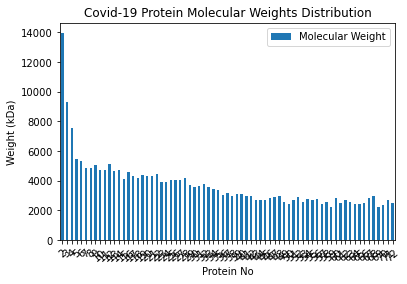

In [74]:
plt.figure(figsize=(20,3));
plt.tight_layout()
ax = df_jan_2000.plot.bar(x='Protein No', y='Molecular Weight', rot=40)
plt.title("Covid-19 Protein Molecular Weights Distribution")
plt.ylabel("Weight (kDa)")

Most proteins weigh less than 50,000 kDa. One protein, however, weighs over 300,000 kDa

In [142]:
Amino_acid_6 = "WFRFFRHLSFFRNYTNYHFIF"
result_handle = NCBIWWW.qblast("blastn", "nt", Seq(Amino_acid_6))
blast_records = NCBIXML.parse(result_handle)

In [143]:
for b in blast_records:
    for alignment in b.alignments:
        for hsp in alignment.hsps:
            print('****Alignment****')
            print('sequence:', alignment.title)
            print('length:', alignment.length)
            print('e value:', hsp.expect)
            print(hsp.query[0:100] + '...')
            print(hsp.match[0:100] + '...')
            print(hsp.sbjct[0:100] + '...')

### September Sample

In [76]:
protein_sep = protein_analysis(df_sep)

Protein of Interest =  {'A': 179, 'C': 90, 'D': 179, 'E': 101, 'F': 143, 'G': 149, 'H': 70, 'I': 129, 'K': 159, 'L': 234, 'M': 63, 'N': 150, 'P': 109, 'Q': 88, 'R': 112, 'S': 162, 'T': 183, 'V': 229, 'W': 32, 'Y': 140}
Amino acids percent =     {'A': 0.06627175120325805, 'C': 0.03332099222510181, 'D': 0.06627175120325805, 'E': 0.03739355794150315, 'F': 0.052943354313217325, 'G': 0.05516475379489078, 'H': 0.0259163272861903, 'I': 0.047760088855979266, 'K': 0.05886708626434654, 'L': 0.08663457978526472, 'M': 0.02332469455757127, 'N': 0.055534987041836355, 'P': 0.04035542391706775, 'Q': 0.03258052573121066, 'R': 0.04146612365790448, 'S': 0.05997778600518327, 'T': 0.06775268419104036, 'V': 0.08478341355053684, 'W': 0.011847463902258423, 'Y': 0.0518326545723806}
Molecular weight =  [305113.79450000194]
Aromaticity =  0.11662347278785636
Flexibility =  [1.0018452380952383, 0.9605952380952383, 0.9607261904761906, 0.9706904761904761, 1.0002857142857142, 0.9623214285714287, 1.001261904761905, 0

In [77]:
POI_list = [] # protein of interest
MW_list = [] # MW: molecular weight
from Bio.SeqUtils import ProtParam
for amino_acid in df_sep['sequence_str']:
    X = ProtParam.ProteinAnalysis(str(amino_acid))
        
    POI = X.count_amino_acids()
    POI_list.append(POI)
    MW = X.molecular_weight()
    MW_list.append(MW)

In [125]:
df_sep['Molecular Weight'] = MW_list
df_sep['POI']=POI_list
df_sep.loc[:,"Protein No"] = np.arange(73)
df_sep

,sequence,sequence_str,length,Molecular Weight,Protein No,POI
547,"[C, T, I, V, F, K, R, V, C, G, V, S, A, A, R, ...",CTIVFKRVCGVSAARLTPCGTGTSTDVVYRAFDIYNDKVAGFAKFL...,2701,305113.7945,0,"{'A': 179, 'C': 90, 'D': 179, 'E': 101, 'F': 1..."
693,"[A, S, A, Q, R, S, Q, I, T, L, H, I, N, E, L, ...",ASAQRSQITLHINELMDLFMRIFTIGTVTLKQGEIKDATPSDFVRA...,290,32836.4889,1,"{'A': 15, 'C': 7, 'D': 13, 'E': 12, 'F': 14, '..."
718,"[T, N, M, K, I, I, L, F, L, A, L, I, T, L, A, ...",TNMKIILFLALITLATCELYHYQECVRGTTVLLKEPCSSGTYEGNS...,123,13959.2201,2,"{'A': 9, 'C': 6, 'D': 2, 'E': 8, 'F': 10, 'G':..."
694,"[A, Q, A, D, E, Y, E, L, M, Y, S, F, V, S, E, ...",AQADEYELMYSFVSEETGTLIVNSVLLFLAFVVFLLVTLAILTALR...,83,9284.8726,3,"{'A': 6, 'C': 3, 'D': 2, 'E': 4, 'F': 5, 'G': ..."
717,"[Q, Q, M, F, H, L, V, D, F, Q, V, T, I, A, E, ...",QQMFHLVDFQVTIAEILLIIMRTFKVSIWNLDYIINLIIKNLSKSL...,63,7528.7150,4,"{'A': 1, 'C': 0, 'D': 4, 'E': 5, 'F': 3, 'G': ..."
...,...,...,...,...,...,...
299,"[W, F, R, F, F, R, H, L, S, F, F, R, N, Y, T, ...",WFRFFRHLSFFRNYTNYHFIF,21,2946.3255,68,"{'A': 0, 'C': 0, 'D': 0, 'E': 0, 'F': 7, 'G': ..."
8,"[T, A, L, C, V, H, Q, T, F, G, C, S, N, C, T, ...",TALCVHQTFGCSNCTSWSCYG,21,2268.5276,69,"{'A': 1, 'C': 4, 'D': 0, 'E': 0, 'F': 1, 'G': ..."
74,"[Q, S, S, C, N, G, L, H, Y, R, W, C, C, S, V, ...",QSSCNGLHYRWCCSVDFAVAN,21,2360.6063,70,"{'A': 2, 'C': 3, 'D': 1, 'E': 0, 'F': 1, 'G': ..."
96,"[Y, D, G, N, K, Q, Y, L, H, T, Q, R, R, C, T, ...",YDGNKQYLHTQRRCTNKGYFW,21,2678.9358,71,"{'A': 0, 'C': 1, 'D': 1, 'E': 0, 'F': 1, 'G': ..."


Comparing Jan with Sep

<Figure size 432x288 with 0 Axes>

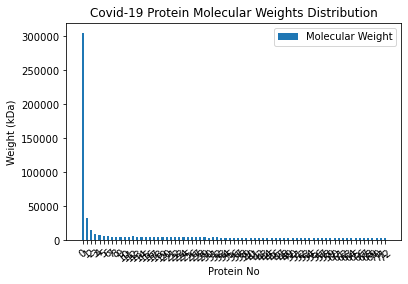

In [79]:
plt.figure();
ax = df_sep.plot.bar(x='Protein No', y='Molecular Weight', rot=40)
plt.title("Covid-19 Protein Molecular Weights Distribution")
plt.ylabel("Weight (kDa)")
ax.autoscale(enable=True) 

In [80]:
df_jan

,sequence,sequence_str,length,Molecular Weight,POI,Protein No
548,"[C, T, I, V, F, K, R, V, C, G, V, S, A, A, R, ...",CTIVFKRVCGVSAARLTPCGTGTSTDVVYRAFDIYNDKVAGFAKFL...,2701,305149.8101,"{'A': 179, 'C': 89, 'D': 178, 'E': 101, 'F': 1...",0
694,"[A, S, A, Q, R, S, Q, I, T, L, H, I, N, E, L, ...",ASAQRSQITLHINELMDLFMRIFTIGTVTLKQGEIKDATPSDFVRA...,290,32785.3991,"{'A': 15, 'C': 7, 'D': 13, 'E': 12, 'F': 14, '...",1
719,"[T, N, M, K, I, I, L, F, L, A, L, I, T, L, A, ...",TNMKIILFLALITLATCELYHYQECVRGTTVLLKEPCSSGTYEGNS...,123,13959.2201,"{'A': 9, 'C': 6, 'D': 2, 'E': 8, 'F': 10, 'G':...",2
695,"[A, Q, A, D, E, Y, E, L, M, Y, S, F, V, S, E, ...",AQADEYELMYSFVSEETGTLIVNSVLLFLAFVVFLLVTLAILTALR...,83,9284.8726,"{'A': 6, 'C': 3, 'D': 2, 'E': 4, 'F': 5, 'G': ...",3
718,"[Q, Q, M, F, H, L, V, D, F, Q, V, T, I, A, E, ...",QQMFHLVDFQVTIAEILLIIMRTFKVSIWNLDYIINLIIKNLSKSL...,63,7528.7150,"{'A': 1, 'C': 0, 'D': 4, 'E': 5, 'F': 3, 'G': ...",4
...,...,...,...,...,...,...
300,"[W, F, R, F, F, R, H, L, S, F, F, R, N, Y, T, ...",WFRFFRHLSFFRNYTNYHFIF,21,2946.3255,"{'A': 0, 'C': 0, 'D': 0, 'E': 0, 'F': 7, 'G': ...",68
9,"[T, A, L, C, V, H, Q, T, F, G, G, S, N, C, T, ...",TALCVHQTFGGSNCTSWSCYG,21,2222.4360,"{'A': 1, 'C': 3, 'D': 0, 'E': 0, 'F': 1, 'G': ...",69
75,"[Q, S, S, C, N, G, L, H, Y, R, W, C, C, S, V, ...",QSSCNGLHYRWCCSVDFAVAN,21,2360.6063,"{'A': 2, 'C': 3, 'D': 1, 'E': 0, 'F': 1, 'G': ...",70
97,"[Y, D, G, N, K, Q, Y, L, H, T, Q, R, R, C, T, ...",YDGNKQYLHTQRRCTNKGYFW,21,2678.9358,"{'A': 0, 'C': 1, 'D': 1, 'E': 0, 'F': 1, 'G': ...",71


In [81]:
df_all = df_jan.drop(['sequence'], axis=1)

In [82]:
df_sep_ = df_sep.drop(['sequence'], axis=1)

In [83]:
df_compare=df_all.merge(df_sep, on='Protein No', how='left')

In [87]:
df_compare = df_compare.drop([0])

In [88]:
df_compare

,sequence_str_x,length_x,Molecular Weight_x,POI,Protein No,sequence,sequence_str_y,length_y,Molecular Weight_y
1,ASAQRSQITLHINELMDLFMRIFTIGTVTLKQGEIKDATPSDFVRA...,290,32785.3991,"{'A': 15, 'C': 7, 'D': 13, 'E': 12, 'F': 14, '...",1,"[A, S, A, Q, R, S, Q, I, T, L, H, I, N, E, L, ...",ASAQRSQITLHINELMDLFMRIFTIGTVTLKQGEIKDATPSDFVRA...,290,32836.4889
2,TNMKIILFLALITLATCELYHYQECVRGTTVLLKEPCSSGTYEGNS...,123,13959.2201,"{'A': 9, 'C': 6, 'D': 2, 'E': 8, 'F': 10, 'G':...",2,"[T, N, M, K, I, I, L, F, L, A, L, I, T, L, A, ...",TNMKIILFLALITLATCELYHYQECVRGTTVLLKEPCSSGTYEGNS...,123,13959.2201
3,AQADEYELMYSFVSEETGTLIVNSVLLFLAFVVFLLVTLAILTALR...,83,9284.8726,"{'A': 6, 'C': 3, 'D': 2, 'E': 4, 'F': 5, 'G': ...",3,"[A, Q, A, D, E, Y, E, L, M, Y, S, F, V, S, E, ...",AQADEYELMYSFVSEETGTLIVNSVLLFLAFVVFLLVTLAILTALR...,83,9284.8726
4,QQMFHLVDFQVTIAEILLIIMRTFKVSIWNLDYIINLIIKNLSKSL...,63,7528.7150,"{'A': 1, 'C': 0, 'D': 4, 'E': 5, 'F': 3, 'G': ...",4,"[Q, Q, M, F, H, L, V, D, F, Q, V, T, I, A, E, ...",QQMFHLVDFQVTIAEILLIIMRTFKVSIWNLDYIINLIIKNLSKSL...,63,7528.7150
5,TMLRCYFPKCSEKNNQGYTPLVVTHNFDFTFSFSPEYSMVFVLFFV,46,5483.2746,"{'A': 0, 'C': 2, 'D': 1, 'E': 2, 'F': 8, 'G': ...",5,"[T, M, L, R, C, Y, F, P, K, C, S, E, K, N, N, ...",TMLRCYFPKCSEKNNQGYTPLVVTHNFDFTFSFSPEYSMVFVLFFV,46,5483.2746
...,...,...,...,...,...,...,...,...,...
68,WFRFFRHLSFFRNYTNYHFIF,21,2946.3255,"{'A': 0, 'C': 0, 'D': 0, 'E': 0, 'F': 7, 'G': ...",68,"[W, F, R, F, F, R, H, L, S, F, F, R, N, Y, T, ...",WFRFFRHLSFFRNYTNYHFIF,21,2946.3255
69,TALCVHQTFGGSNCTSWSCYG,21,2222.4360,"{'A': 1, 'C': 3, 'D': 0, 'E': 0, 'F': 1, 'G': ...",69,"[T, A, L, C, V, H, Q, T, F, G, C, S, N, C, T, ...",TALCVHQTFGCSNCTSWSCYG,21,2268.5276
70,QSSCNGLHYRWCCSVDFAVAN,21,2360.6063,"{'A': 2, 'C': 3, 'D': 1, 'E': 0, 'F': 1, 'G': ...",70,"[Q, S, S, C, N, G, L, H, Y, R, W, C, C, S, V, ...",QSSCNGLHYRWCCSVDFAVAN,21,2360.6063
71,YDGNKQYLHTQRRCTNKGYFW,21,2678.9358,"{'A': 0, 'C': 1, 'D': 1, 'E': 0, 'F': 1, 'G': ...",71,"[Y, D, G, N, K, Q, Y, L, H, T, Q, R, R, C, T, ...",YDGNKQYLHTQRRCTNKGYFW,21,2678.9358


Text(0, 0.5, 'Sep Sequence')

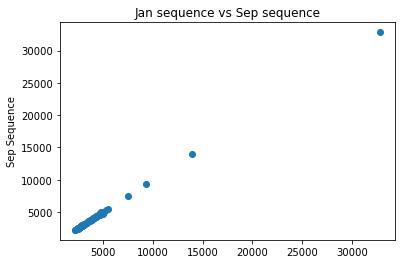

In [133]:
plt.scatter(x=df_compare['Molecular Weight_x'], y=df_compare['Molecular Weight_y'])
plt.title("Jan sequence vs Sep sequence")
plt.ylabel("Jan Sequence")
plt.ylabel("Sep Sequence")

In [92]:
from Bio.Seq import Seq
from Bio.SeqRecord import SeqRecord
record1 = SeqRecord(df_compare['sequence_str_x'])
record2 = SeqRecord(df_compare['sequence_str_y'])
results = record1.seq ==record2.seq
len(results[results==True])/len(results)

0.8888888888888888

In [94]:
(results[results==False])

1     False
7     False
8     False
9     False
10    False
11    False
23    False
69    False
dtype: bool

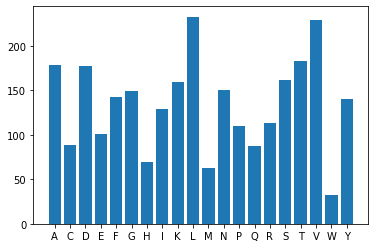

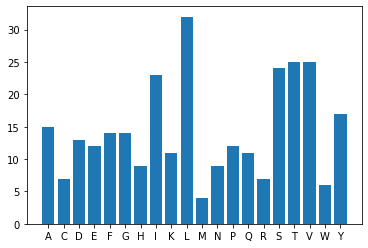

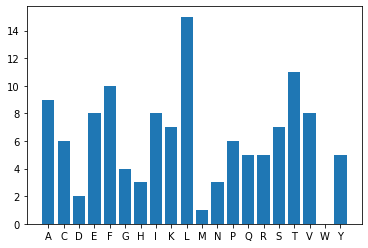

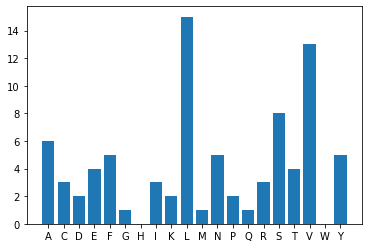

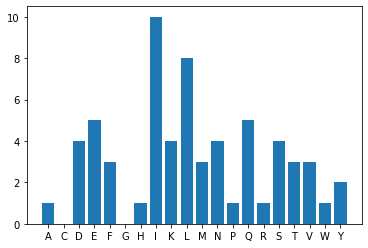

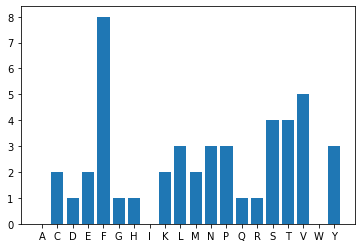

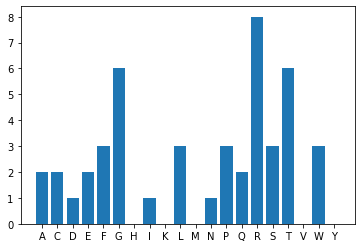

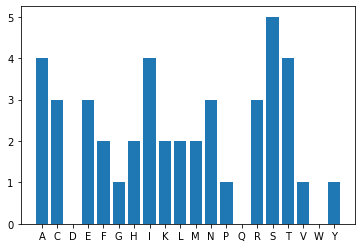

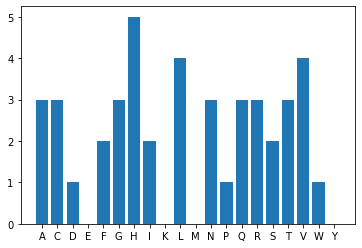

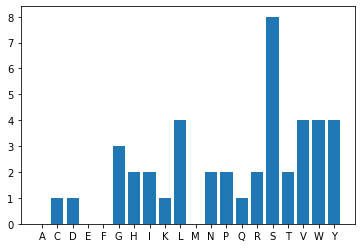

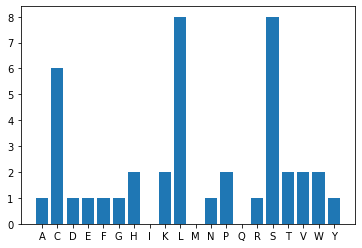

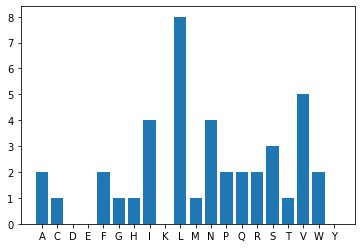

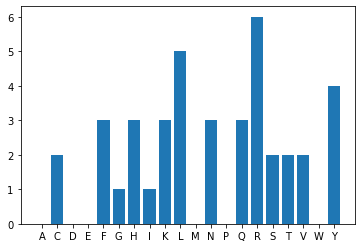

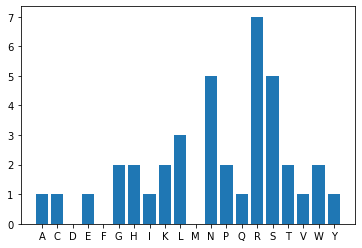

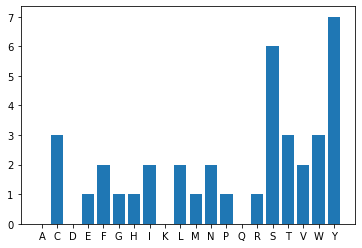

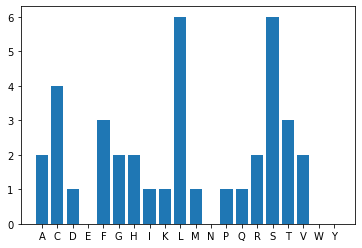

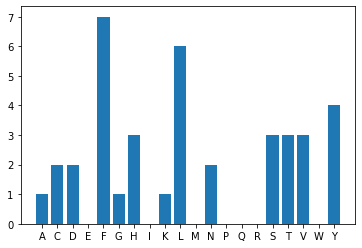

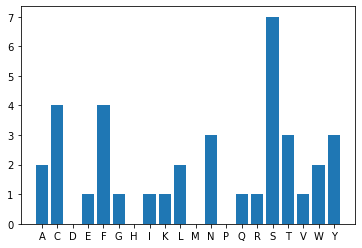

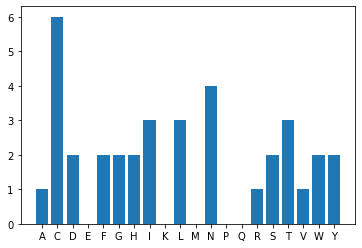

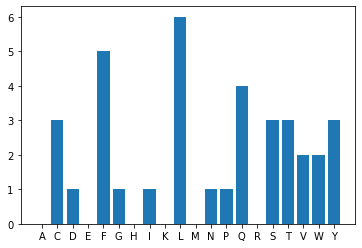

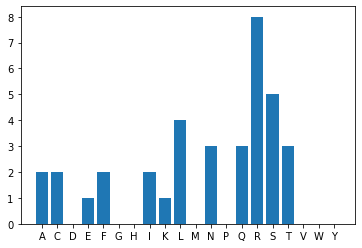

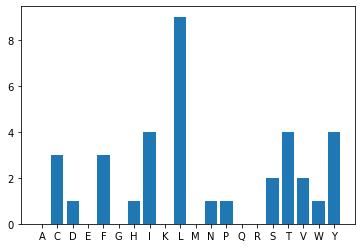

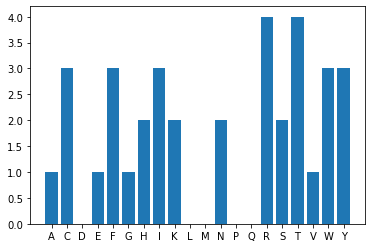

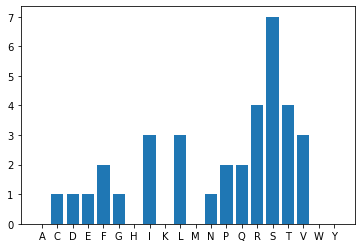

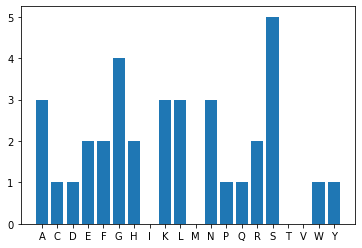

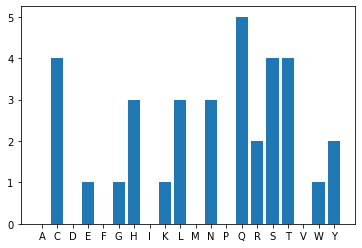

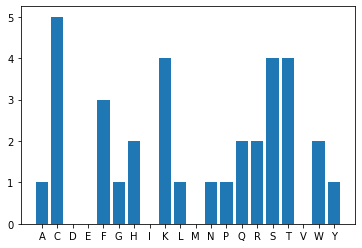

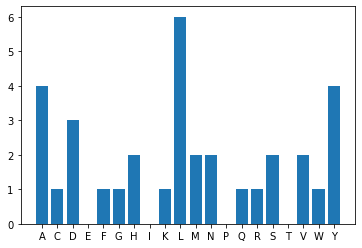

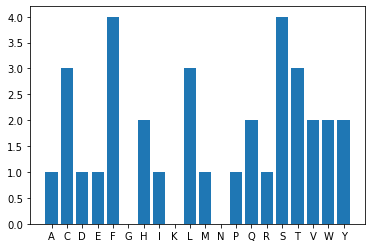

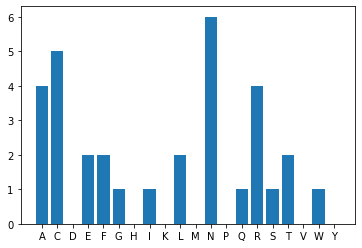

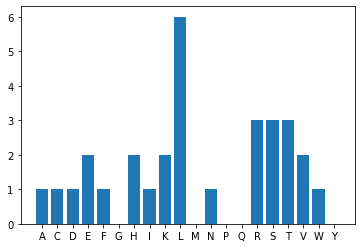

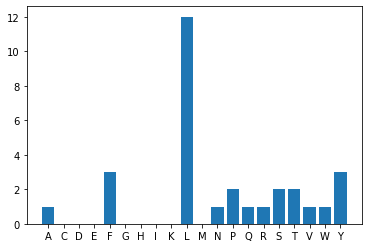

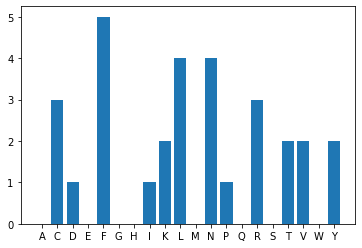

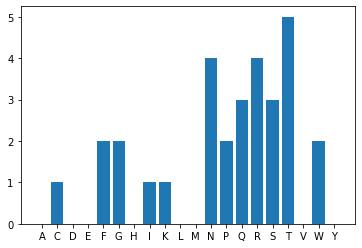

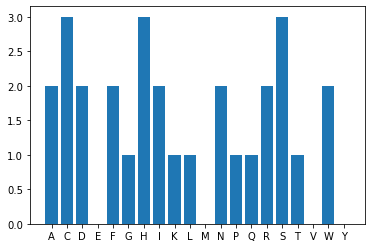

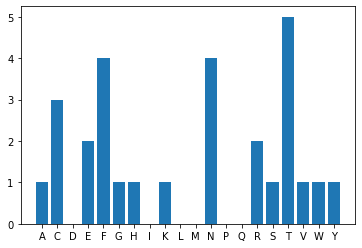

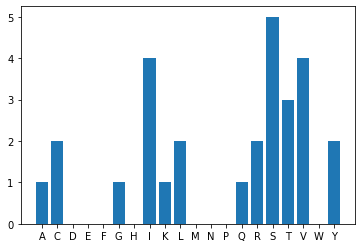

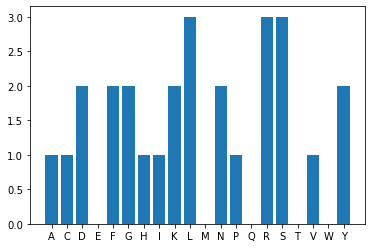

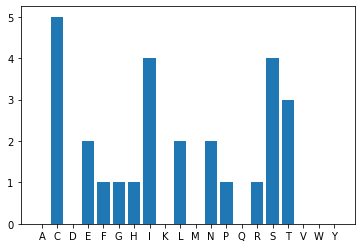

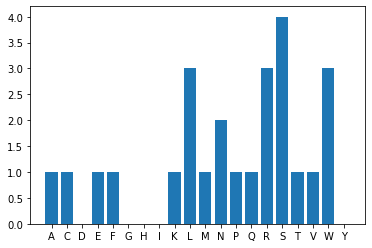

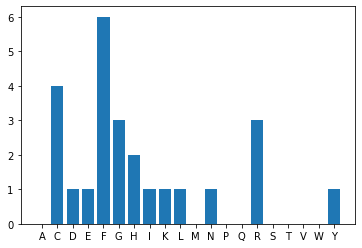

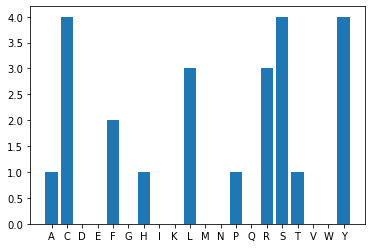

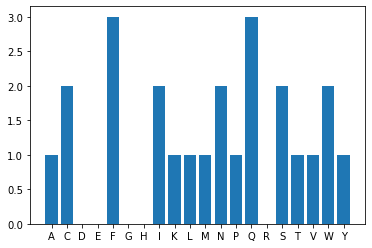

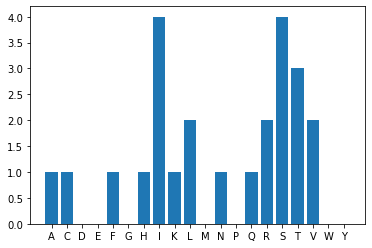

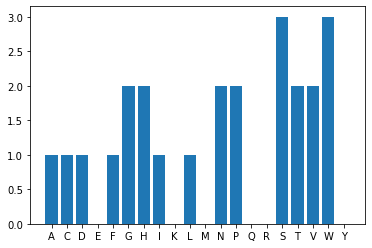

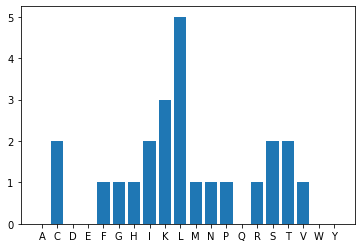

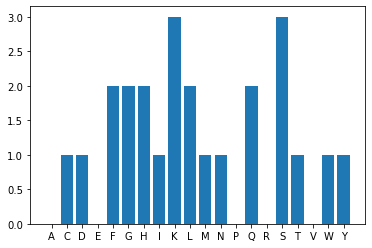

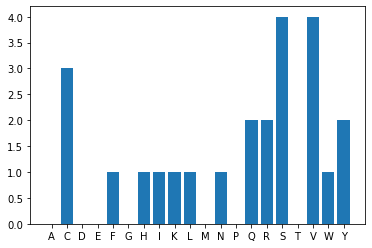

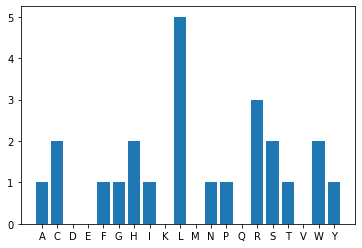

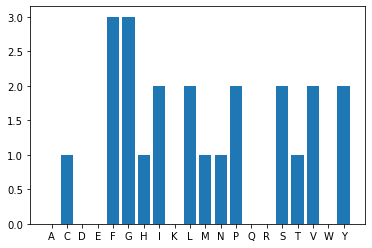

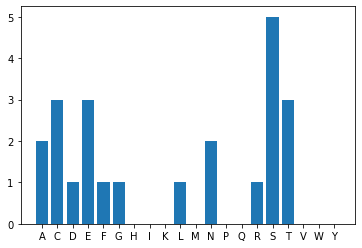

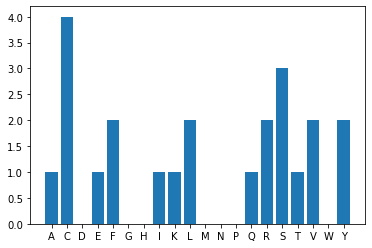

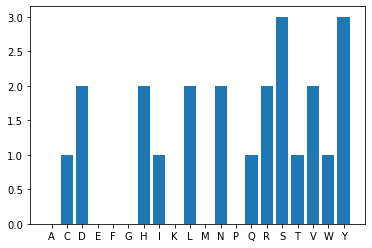

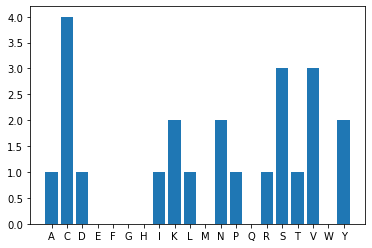

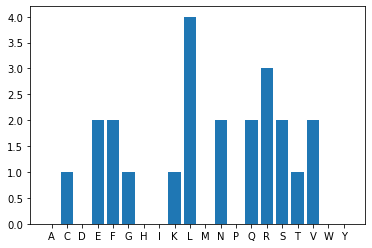

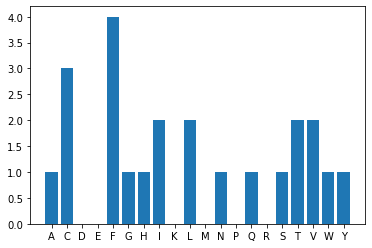

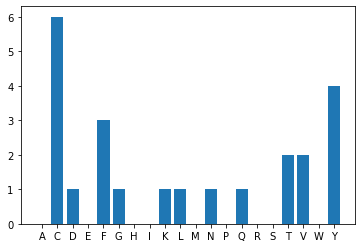

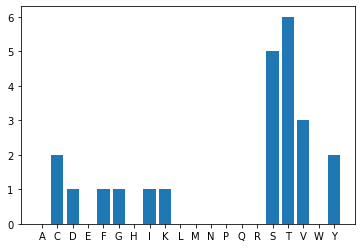

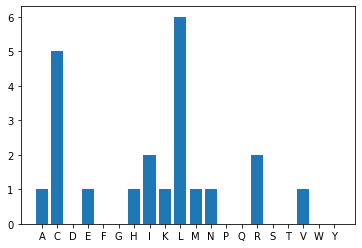

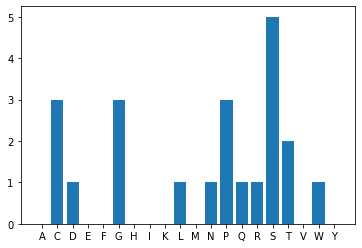

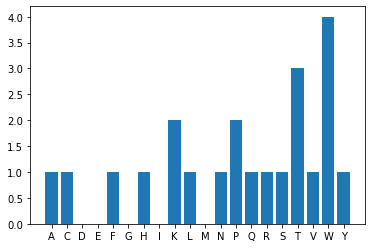

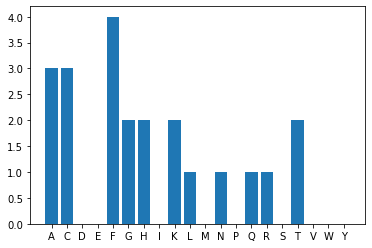

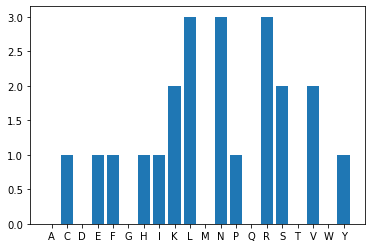

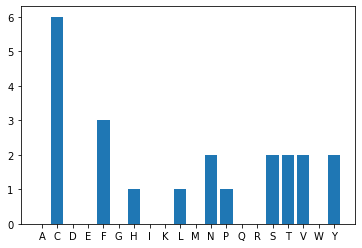

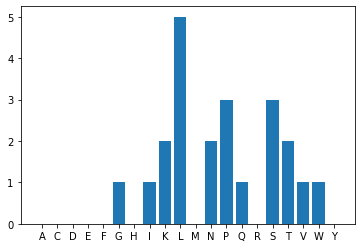

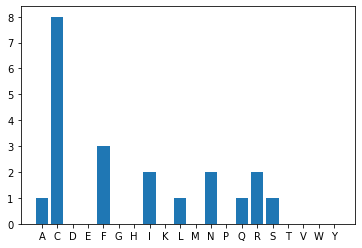

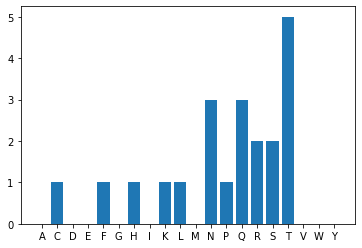

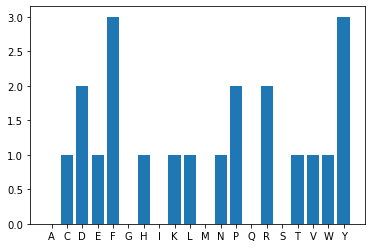

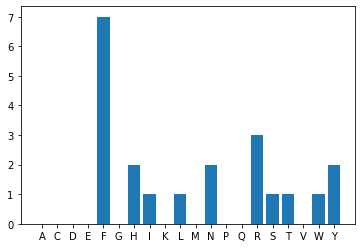

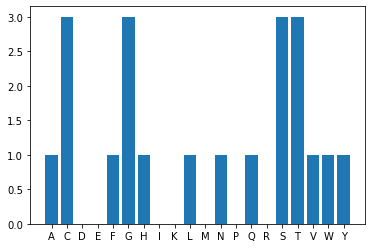

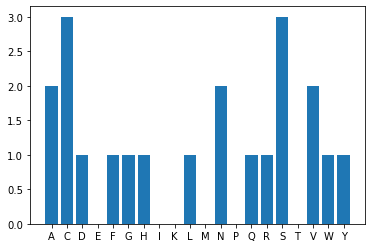

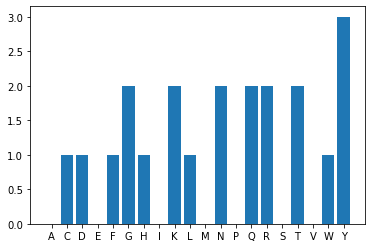

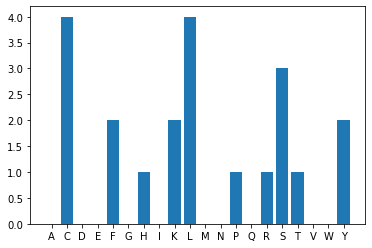

In [117]:
from typing import Dict
def plot_protein(protein: Dict[str, float], ax=plt, fig=plt):
    x = np.arange(len(protein))
    ax.bar(x, protein.values())
    fig.xticks(x, protein.keys())

for i in range(len(df_jan)):
    l = df_jan.iloc[i]['POI']
    plot_protein(l)
    plt.show()

There are 8 potential mutations since the virus was sequenced in Janurary this year. Notice that not all sequences are encoded for functional proteins. The mutations may happen at noncoding locations. Further analysis required to confirm the mutations.

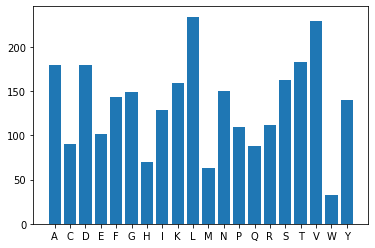

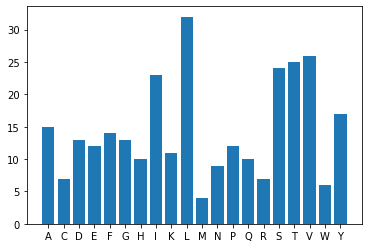

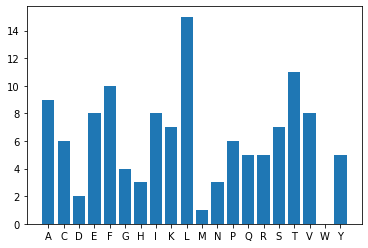

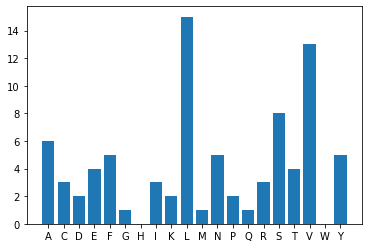

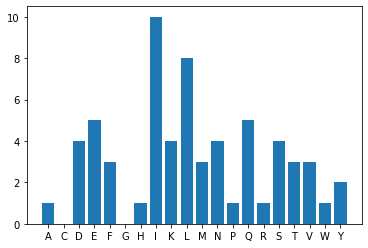

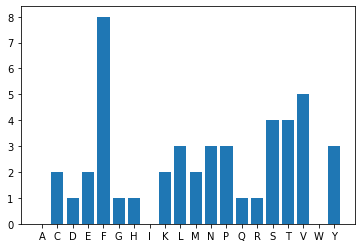

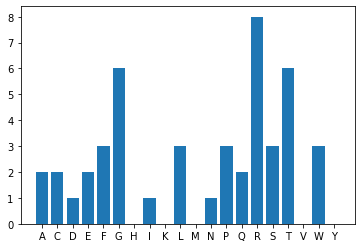

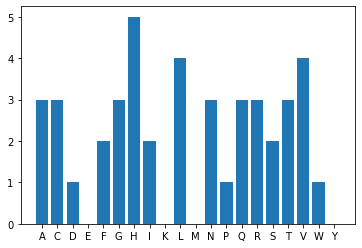

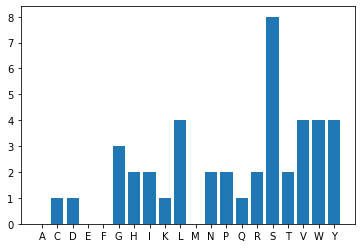

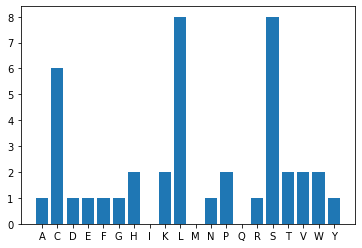

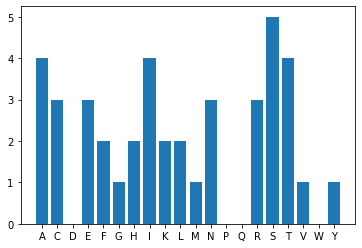

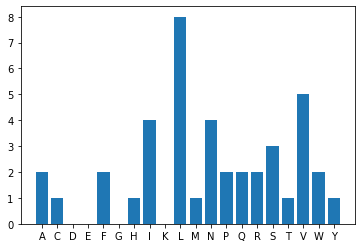

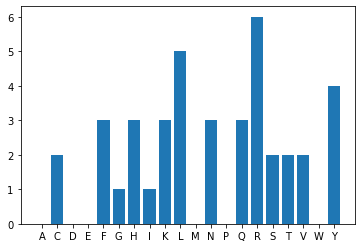

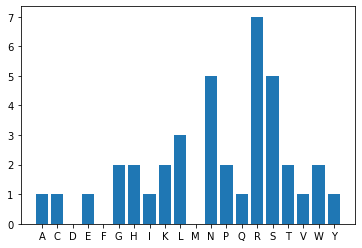

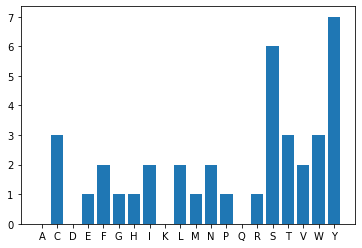

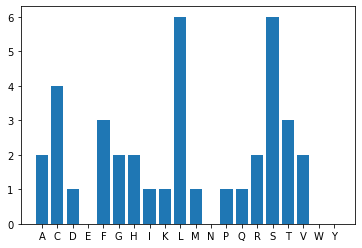

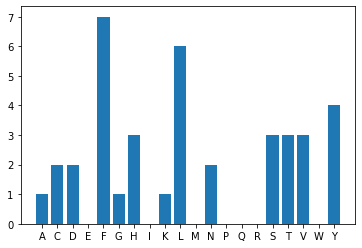

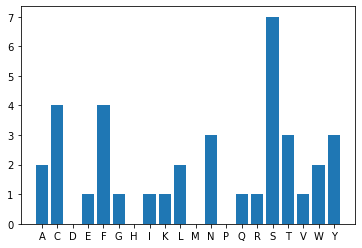

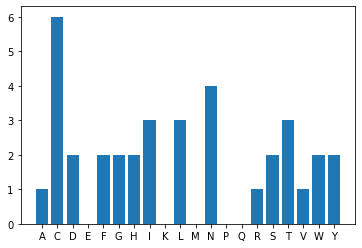

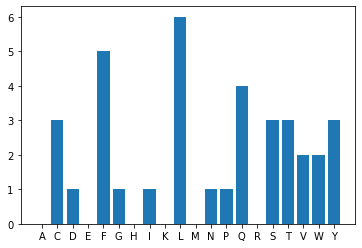

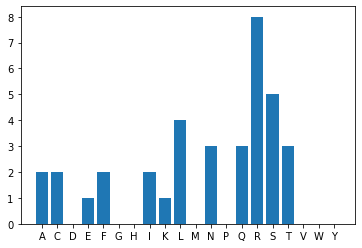

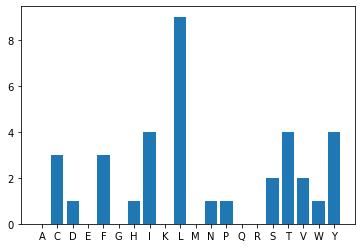

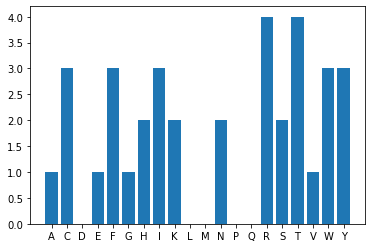

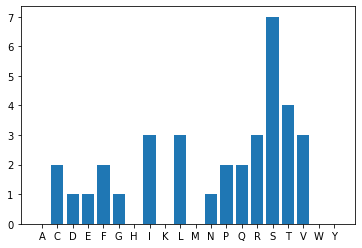

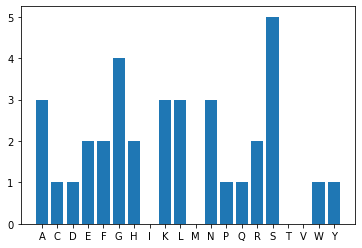

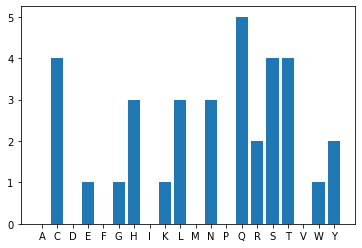

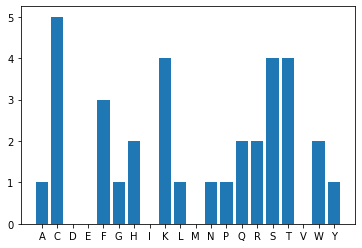

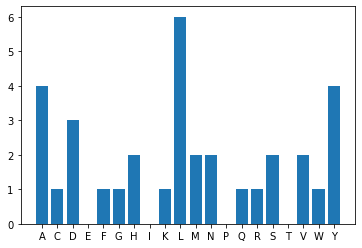

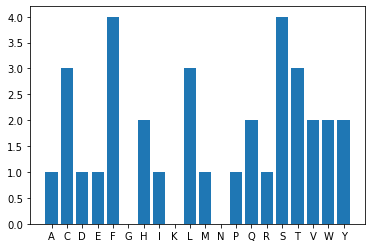

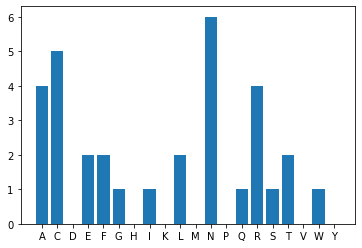

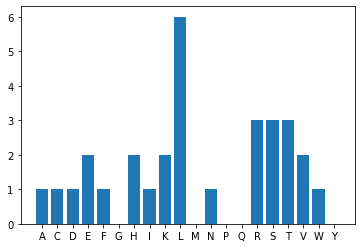

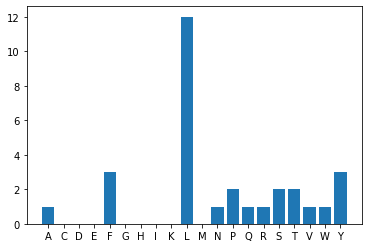

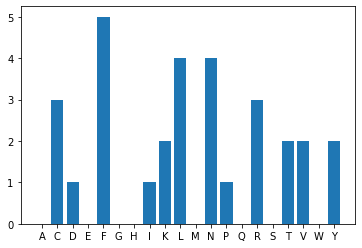

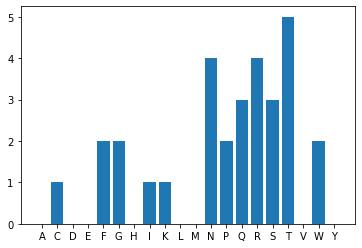

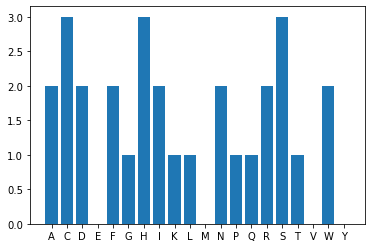

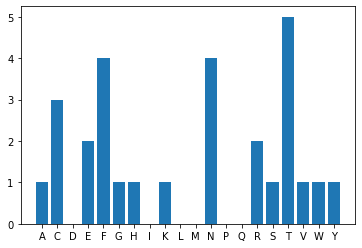

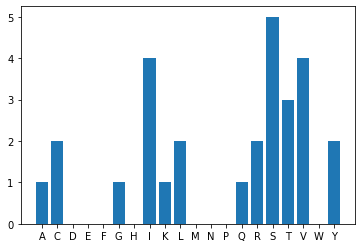

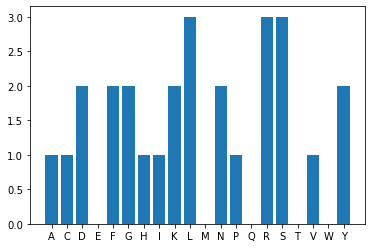

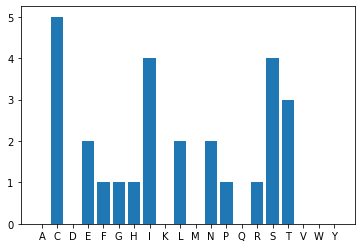

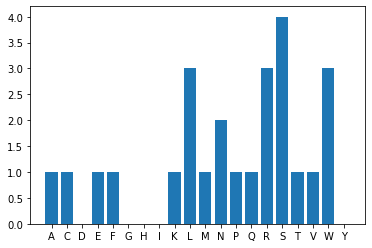

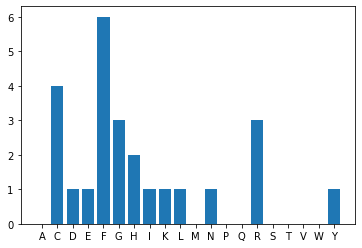

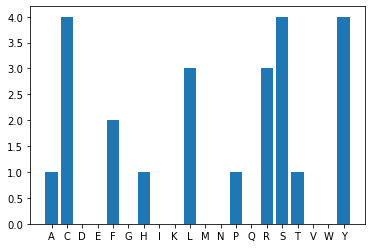

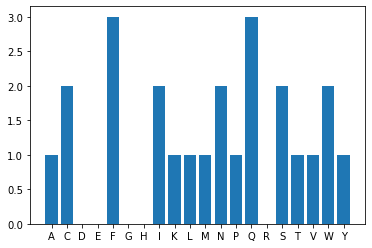

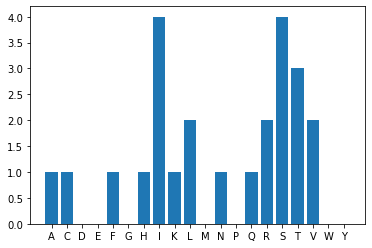

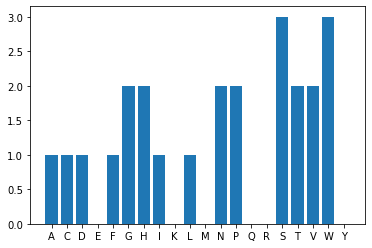

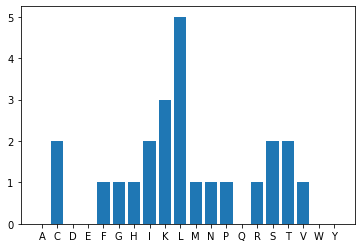

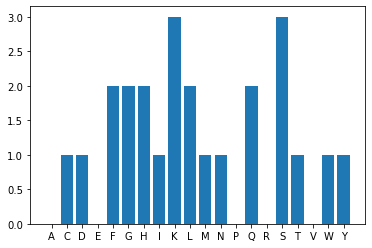

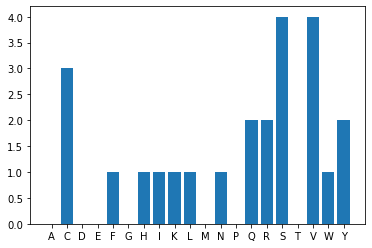

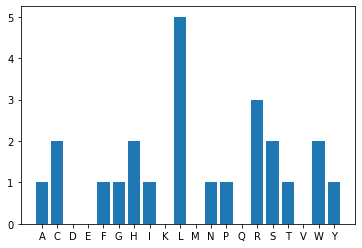

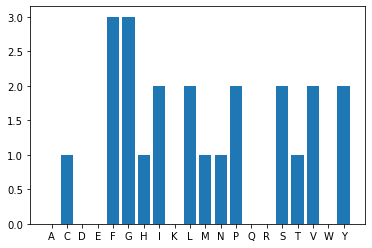

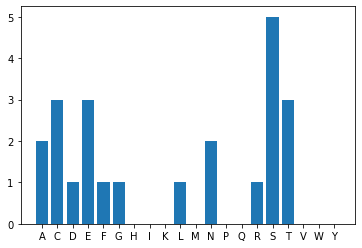

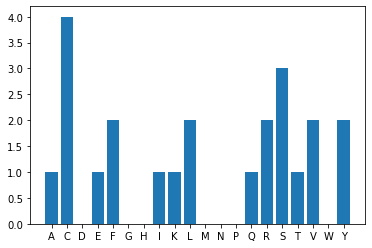

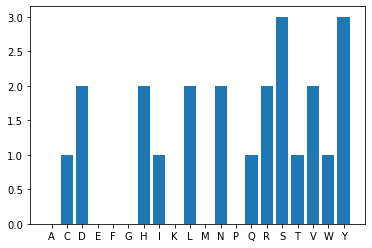

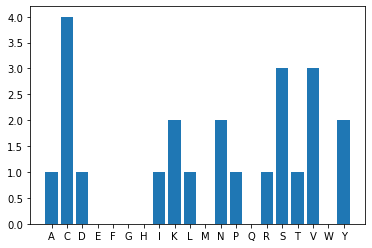

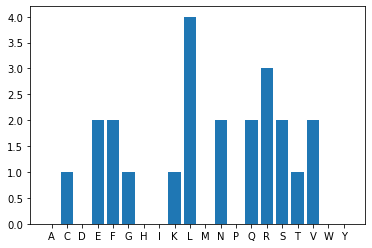

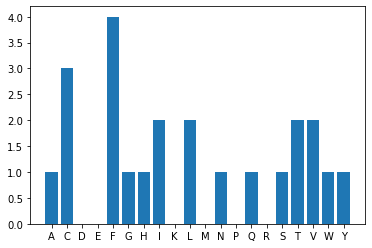

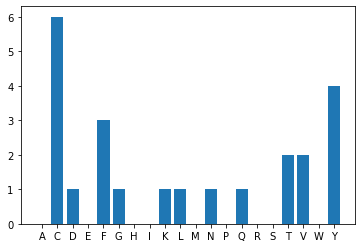

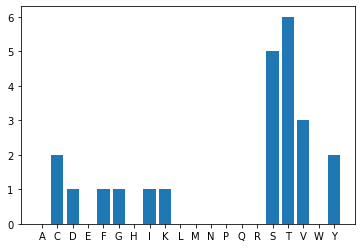

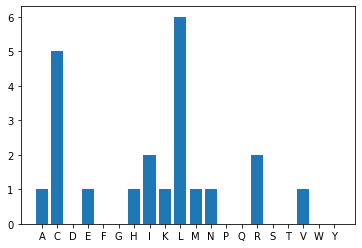

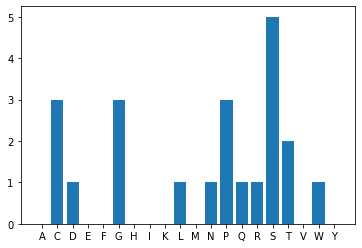

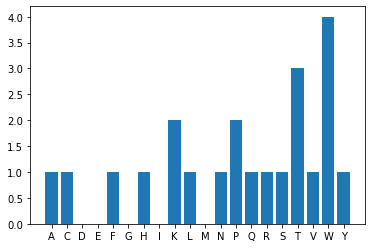

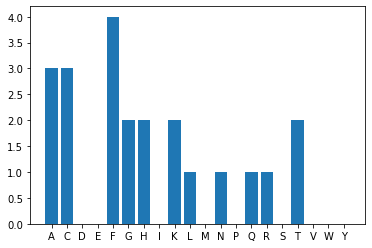

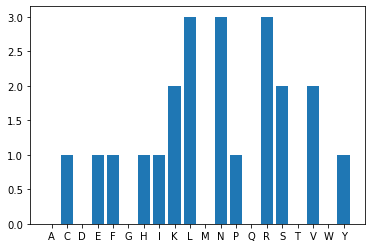

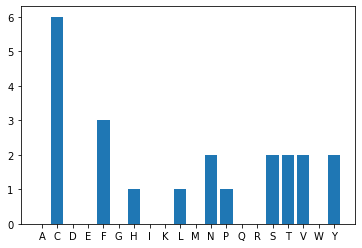

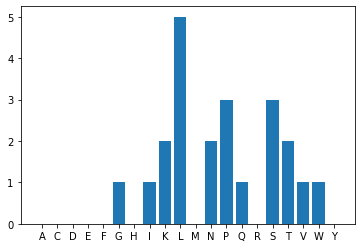

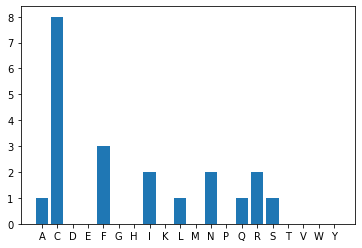

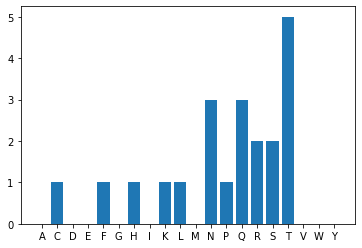

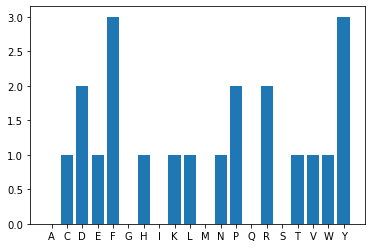

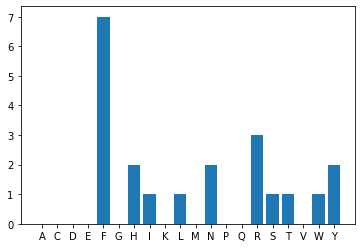

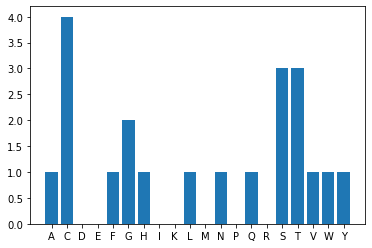

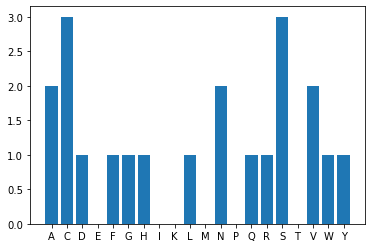

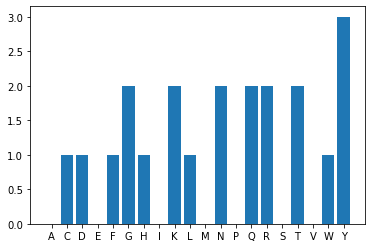

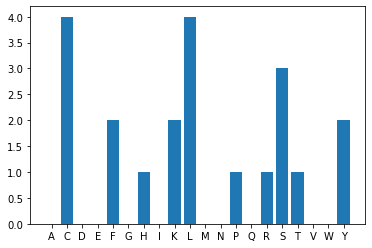

In [126]:
from typing import Dict
def plot_protein(protein: Dict[str, float], ax=plt, fig=plt):
    x = np.arange(len(protein))
    ax.bar(x, protein.values())
    fig.xticks(x, protein.keys())

for i in range(len(df_sep)):
    l = df_sep.iloc[i]['POI']
    plot_protein(l)
    plt.show()

## Protein Compositions Comparison between the January sequence with September sequence

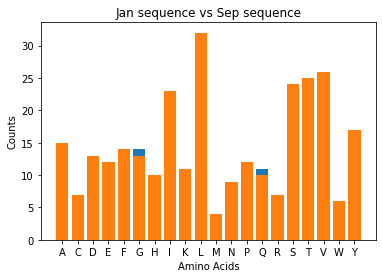

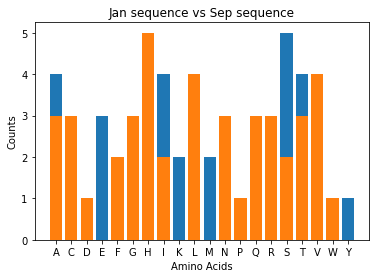

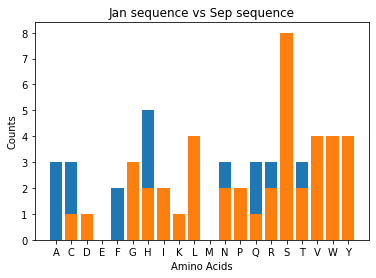

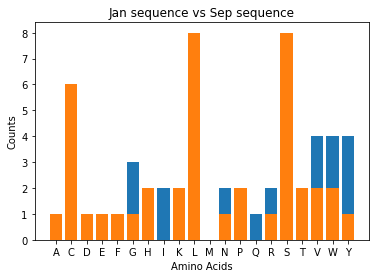

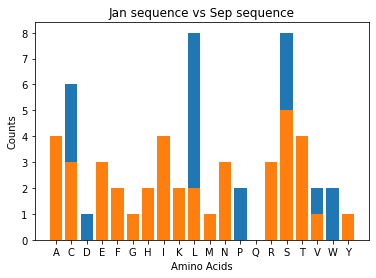

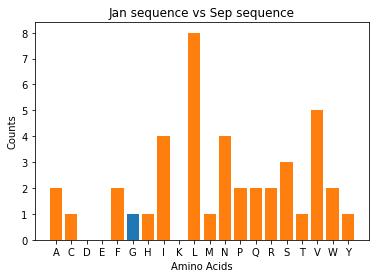

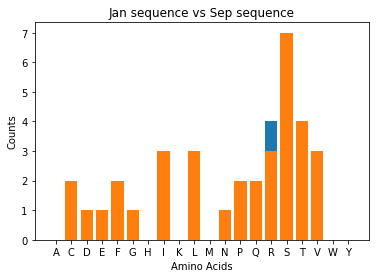

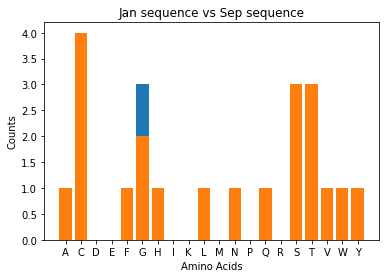

In [141]:
L = [1, 7, 8, 9, 10, 11, 23, 69]

for i in L:
    fig, ax = plt.subplots()
    plot_protein(df_jan.iloc[i]['POI'])
    plot_protein(df_sep.iloc[i]['POI'])
    plt.title("Jan sequence vs Sep sequence")
    plt.xlabel("Amino Acids")
    plt.ylabel("Counts")

# Conclusion

The virus has mutated since its genome was sequenced in January 2020. There are 8 potential mutations when comparing the Jan sequence with the Sep sequence. Accoring to Stefanelli P. et. al., 2020, there are "eight missense mutations can be observed compared to the two reference Wuhan sequences: four locate to the ORF1ab polyprotein, whereby only the mutation L3606F has previously been reported by Phan, 2020." 

Among the potential mutated proteins identified above, the protein number 7, 8,9 & 10 have the most variations between the two sequences. It is unlikely that the virus mutates that quickly. Further analysis needed to understand what might be going on here. Since we know that the virus has about 12 proteins, many proteins shown here are may not be translated to proteins. 

# References:

1. Spiteri G, Fielding J, Diercke M, et al. First cases of coronavirus disease 2019 (COVID-19) in the WHO European Region, 24 January to 21 February 2020. Euro Surveill. 2020;25(9):2000178. doi:10.2807/1560-7917.ES.2020.25.9.2000178

2. Reddy, S. How the Coronavirus Attacks Your Body. The Wall Street Journal. March 27, 2020. https://www.wsj.com/articles/how-the-coronavirus-attacks-your-body-11585343549

3. Mousavizadeh L, Ghasemi S. Genotype and phenotype of COVID-19: Their roles in pathogenesis [published online ahead of print, 2020 Mar 31]. J Microbiol Immunol Infect. 2020;S1684-1182(20)30082-7. doi:10.1016/j.jmii.2020.03.022

4. Yijun Ruan, Chia Lin Wei, et al. Comparative full-length genome sequence analysis of 14 SARS coronavirus isolates and common mutations associated with putative origins of infection, The Lancet 361, Issue 9371, 2003, Pages 1779-1785.

5. Katsnelson, A. What do we know about the novel coronavirus’s 29 proteins?https://cen.acs.org/biological-chemistry/infectious-disease/know-novel-coronaviruss-29-proteins/98/web/2020/04

6. Masters PS. The molecular biology of coronaviruses. Adv Virus Res. 2006;66:193-292. doi:10.1016/S0065-3527(06)66005-3. 
7. Callaway, E. The coronavirus is mutating — does it matter?. Nature 585, 174-177 (2020)

8. Stefanelli P, Faggioni G, Lo Presti A, et al. Whole genome and phylogenetic analysis of two SARS-CoV-2 strains isolated in Italy in January and February 2020: additional clues on multiple introductions and further circulation in Europe. Euro Surveill. 2020;25(13):2000305. doi:10.2807/1560-7917.ES.2020.25.13.2000305

9. Kaplan, S. & Achenbach, J. "This coronavirus mutation has taken over the world. Scientists are trying to understand why". Jul-20-2020. Washington Post. https://www.washingtonpost.com/science/2020/06/29/coronavirus-mutation-science/?arc404=true

10. Comput Biol Med. 2020;121:103749. doi:10.1016/j.compbiomed.2020.103749

11. Stefanelli P, Faggioni G, Lo Presti A, et al. Whole genome and phylogenetic analysis of two SARS-CoV-2 strains isolated in Italy in January and February 2020: additional clues on multiple introductions and further circulation in Europe. Euro Surveill. 2020;25(13):2000305. doi:10.2807/1560-7917.ES.2020.25.13.2000305